In [2]:
%matplotlib inline
import numpy as np

In [3]:
from matplotlib.pylab import plt

# Activities

## Color

In [4]:
import numpy as np

In [5]:
from skimage.data import coffee

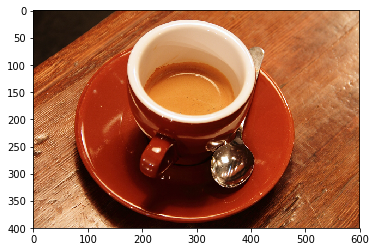

In [6]:
im = coffee()
plt.imshow(im);

In [7]:
#1. Convert the coffee cup to YCbCr and render histograms of the channels
import skimage.color

In [8]:
im.shape

(400, 600, 3)

In [9]:
red = im[:,:,0]
print(red.shape)
print(red.max())

(400, 600)
255


In [10]:
red.flatten()

array([ 21,  21,  20, ..., 158, 144, 143], dtype=uint8)

In [11]:
ycbcr = skimage.color.rgb2ycbcr(im)

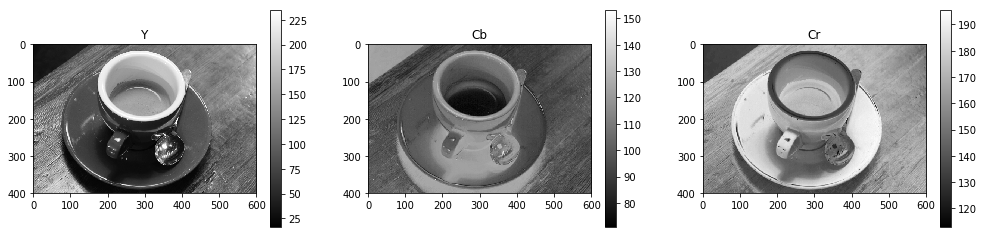

In [12]:

plt.figure(figsize=(17,4))
plt.subplot(1, 3, 1)
plt.title("Y")
plt.imshow(ycbcr[:, :, 0], cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Cb")
plt.imshow(ycbcr[:, :, 1], cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Cr")
plt.imshow(ycbcr[:, :, 2], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

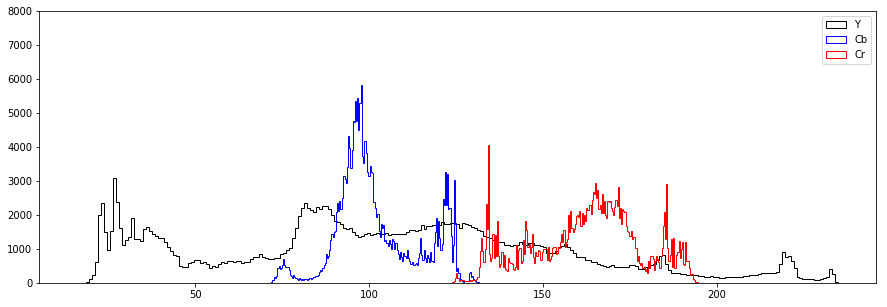

In [13]:
plt.figure(figsize=(15,5))
plt.hist(ycbcr[:, :, 0].flatten(), histtype='step', color='k', bins=255, label='Y');
plt.hist(ycbcr[:, :, 1].flatten(), histtype='step', color='b', bins=255, label='Cb');
plt.hist(ycbcr[:, :, 2].flatten(), histtype='step', color='r', bins=255, label='Cr');
plt.ylim(0, 8000)
plt.legend(ncol=1, loc='best')
plt.show()

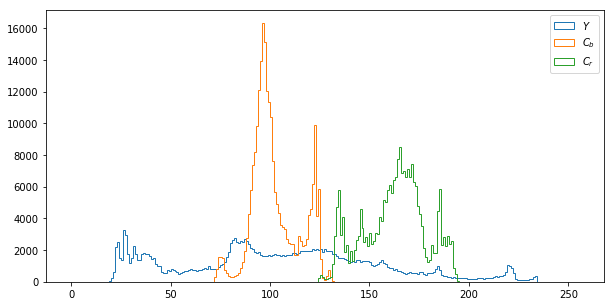

In [14]:
#3. Try to find a range of Y, Cr, Cb that select _only_ her face
plt.figure(figsize=(10,5))
plt.hist(ycbcr[:,:,0].flatten(), bins=255, range=(0,255), histtype='step', label="$Y$");
plt.hist(ycbcr[:,:,1].flatten(), bins=255, range=(0,255), histtype='step', label="$C_b$");
plt.hist(ycbcr[:,:,2].flatten(), bins=255, range=(0,255), histtype='step', label="$C_r$");
# HINT: you can use relational opterators like: ycbcr[:,:,1] > 50 work, they give you 
plt.legend()
plt.savefig('foo.png')

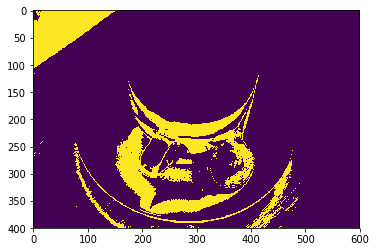

In [16]:
plt.imshow(spoon)

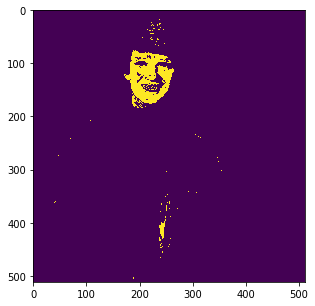

In [485]:
ybr = skimage.color.rgb2ycbcr(im)

Y =  ybr[:,:,0]
Cb = ybr[:,:,1]
Cr = ybr[:,:,2]

face = (Cb >= 101)  & (Cb <= 119) & (Cr > 140) & (Cr < 150) & (Y > 150)
plt.imshow(face)
show()

## Geometry

In [1]:
# 4. Try to construct an affine transfor, that crops in on the shuttle, and rotates it so it is pointing right. 

In [47]:
skimage.transform.warp?

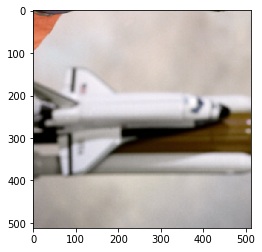

In [383]:
plt.imshow(warp(im, T))

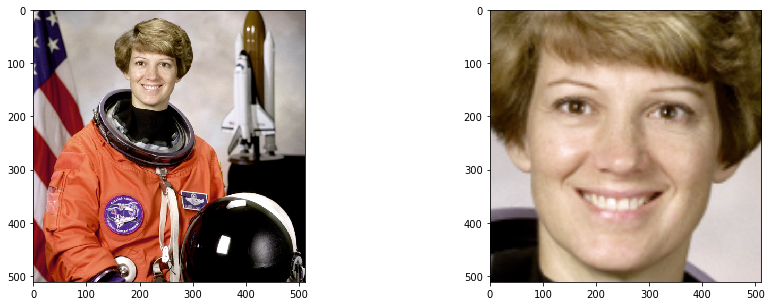

In [512]:
# 5. Try doing zooming in on her face by putting numbers into a 3x3 matrix (instead of using AffinTransform)


np.linalg.inv(A)

subplot(121)
imshow(im)
subplot(122)
plt.imshow(warp(im, A))

## Compositing

In [534]:
from urllib.request import urlretrieve
urlretrieve('https://qph.fs.quoracdn.net/main-qimg-968f41225522207012dd378705832939', 'glasses.png')

('glasses.png', <http.client.HTTPMessage at 0x7f3274852470>)

In [537]:
# 1. Find an image (online) that includes an alpha channel

glasses = skimage.io.imread('glasses.png')

im  = skimage.util.img_as_float(im)
glasses = skimage.util.img_as_float(glasses)

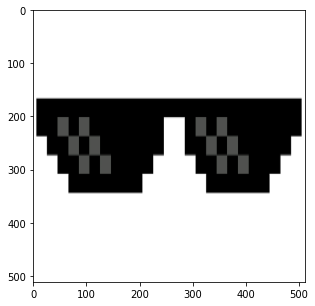

In [558]:
imshow(glasses)

In [183]:
# 2. Combine it with the astronaught image by alpha blending

In [555]:
glasses = skimage.transform.resize(glasses, (512, 512), mode='reflect', anti_aliasing=True)

# warp

alpha = glasses[:,:, 3]
glasses_rgb=glasses[:,:,:3]

In [556]:
alpha = alpha[:,:, None]

In [557]:
comp = (1-alpha)*im + alpha*glasses_rgb

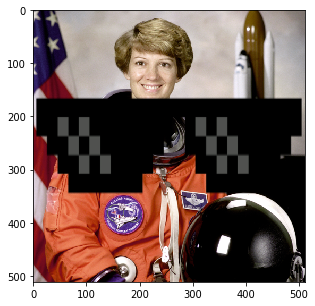

In [553]:
imshow(comp)